In [1]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Descargamos los datos desde internet!
file_name = 'dataR2.csv'

def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
    urllib.request.urlretrieve(url, file_name)


download_file(file_name)

Descargando el dataset


In [3]:
#Ahora si cargamos los datos en jupyter!
data = pd.read_csv(file_name)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


**Insights**:

* El dataset se compone de 10 columnas de las cuales 9 corresponden a variables independientes, que usaremos para predecir el target. 

* Classification es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

In [4]:
#Separamos en X e y
X = data.drop(["Classification"], axis=1)
y = data["Classification"]

In [5]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [6]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [7]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación: 

1. Calcular la métrica Accuracy.

In [8]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred)}")

Accuracy of the classifier is: 0.6


2. Crear la Matriz de Confusión

[[ 7  9]
 [ 5 14]]


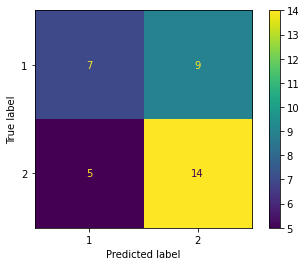

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

3. Calcular la métrica Recall

In [10]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test,y_test_pred)}")

Recall Score of the classifier is: 0.4375


4.Calcular la métrica F1 score

In [11]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.5


# Random Forest

In [12]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [13]:
y_test_pred = model.predict(X_test) #Prediccion en Test

1. Calcular la métrica Accuracy.

In [14]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred )}")

Accuracy of the classifier is: 0.6571428571428571


2. Calcular la métrica Precision

In [15]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.6666666666666666


3. Calcular la métrica Recall

In [16]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

Recall Score of the classifier is: 0.5


4. Calcular la métrica F1 score

In [17]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.5714285714285715
